<a href="https://colab.research.google.com/github/DEEPIKA-KONDAPALLI/WaterManagement_UsingML/blob/main/WaterManagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from datetime import datetime
import pandas as pd

In [ ]:
latitude = 16.818231
longitude = 81.902651




In [ ]:
import requests

def fetch_weather_data(api_key, latitude, longitude):
    url = f"http://api.openweathermap.org/data/2.5/weather?lat={latitude}&lon={longitude}&appid={api_key}&units=metric"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        print("Data fetched successfully!")
        return {
            'temperature': data['main']['temp'],
            'humidity': data['main']['humidity'],
            'rain': data['rain']['1h'] if 'rain' in data else 0
        }
    else:
        print("Error fetching data:", response.status_code)
        return None

# Fetch sample data
api_key = 'c6b0ce231fa2f10d85ba6985bdb52d7b'  # Replace with your OpenWeatherMap API Key

weather_data = fetch_weather_data(api_key, latitude, longitude)
weather_data



Data fetched successfully!


{'temperature': 28.25, 'humidity': 75, 'rain': 0}

In [100]:


def fetch_weather_data(api_key, latitude, longitude):
    url = f"http://api.openweathermap.org/data/2.5/weather?lat={latitude}&lon={longitude}&appid={api_key}&units=metric"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        print("Data fetched successfully!")
        return {
            'temperature': data['main']['temp'],
            'humidity': data['main']['humidity'],
            'rain': data['rain']['1h'] if 'rain' in data else 0,
            'wind_speed': data['wind']['speed'],
            'wind_direction': data['wind']['deg'] if 'deg' in data['wind'] else None,
            'pressure': data['main']['pressure'],
            'clouds': data['clouds']['all'] if 'clouds' in data else None,
            'visibility': data['visibility'] if 'visibility' in data else None,
            'description': data['weather'][0]['description'] if 'weather' in data else None
        }
    else:
        print("Error fetching data:", response.status_code)
        return None

# Fetch sample data
api_key = 'c6b0ce231fa2f10d85ba6985bdb52d7b'  # Replace with your OpenWeatherMap API Key


weather_data = fetch_weather_data(api_key, latitude, longitude)
weather_data


Data fetched successfully!


{'temperature': 12.51,
 'humidity': 87,
 'rain': 0.25,
 'wind_speed': 5.66,
 'wind_direction': 170,
 'pressure': 1018,
 'clouds': 75,
 'visibility': 10000,
 'description': 'light rain'}

In [101]:


def fetch_soil_data(api_key, latitude, longitude):
    url = f"http://api.agromonitoring.com/agro/1.0/soil?lat={latitude}&lon={longitude}&appid={api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        print("Soil data fetched successfully!")
        return {
            'soil_temperature_10cm': round(data['t10'] - 273.15, 2) if 't10' in data else None,  # °C at 10 cm depth
            'soil_moisture': data['moisture'] * 100 if 'moisture' in data else None,  # Converted to percentage
            'soil_temperature_surface': round(data['t0'] - 273.15, 2) if 't0' in data else None  # °C at surface
        }
    else:
        print("Error fetching soil data:", response.status_code)
        return None

# Replace with your Agromonitoring API Key
agro_api_key = '033dcd635934834c78a525da42e25bd7'


soil_data = fetch_soil_data(agro_api_key, latitude, longitude)
soil_data


Soil data fetched successfully!


{'soil_temperature_10cm': 12.99,
 'soil_moisture': 4.3999999999999995,
 'soil_temperature_surface': 14.89}

In [102]:


# Function to fetch weather data
def fetch_weather_data(api_key, latitude, longitude):
    url = f"http://api.openweathermap.org/data/2.5/weather?lat={latitude}&lon={longitude}&appid={api_key}&units=metric"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        print("Weather data fetched successfully!")
        return {
            'temperature': data['main']['temp'],
            'humidity': data['main']['humidity'],
            'rain': data['rain']['1h'] if 'rain' in data else 0,
            'wind_speed': data['wind']['speed'],
            'wind_direction': data['wind']['deg'] if 'deg' in data['wind'] else None,
            'pressure': data['main']['pressure'],
            'clouds': data['clouds']['all'] if 'clouds' in data else None,
            'visibility': data['visibility'] if 'visibility' in data else None,
            'description': data['weather'][0]['description'] if 'weather' in data else None
        }
    else:
        print("Error fetching weather data:", response.status_code)
        return None

# Function to fetch soil data
def fetch_soil_data(api_key, latitude, longitude):
    url = f"http://api.agromonitoring.com/agro/1.0/soil?lat={latitude}&lon={longitude}&appid={api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        print("Soil data fetched successfully!")
        return {
            'soil_temperature_10cm': round(data['t10'] - 273.15, 2) if 't10' in data else None,  # °C at 10 cm depth
            'soil_moisture': data['moisture'] * 100 if 'moisture' in data else None,  # Converted to percentage
            'soil_temperature_surface': round(data['t0'] - 273.15, 2) if 't0' in data else None  # °C at surface
        }
    else:
        print("Error fetching soil data:", response.status_code)
        return None

# Replace with your API Keys and coordinates
weather_api_key = 'c6b0ce231fa2f10d85ba6985bdb52d7b'
agro_api_key = '033dcd635934834c78a525da42e25bd7'


# Fetch weather and soil data
weather_data = fetch_weather_data(weather_api_key, latitude, longitude)
soil_data = fetch_soil_data(agro_api_key, latitude, longitude)

# Combine data
if weather_data and soil_data:
    combined_data = {**weather_data, **soil_data}
    # Create a DataFrame and display the table
    df = pd.DataFrame([combined_data])
    print(df)
else:
    print("Failed to fetch one or more datasets.")


Weather data fetched successfully!
Soil data fetched successfully!
   temperature  humidity  rain  wind_speed  wind_direction  pressure  clouds  \
0        12.48        87  0.33        5.66             170      1018      75   

   visibility description  soil_temperature_10cm  soil_moisture  \
0       10000  light rain                  12.99            4.4   

   soil_temperature_surface  
0                     14.89  


In [106]:
df = pd.read_excel('irrigation_data.xlsx')

# Display the first few rows of the dataframe
df.head()

,timestamp,temperature,humidity,rain,wind_speed,pressure,clouds,visibility,description,soil_temperature_10cm,soil_moisture,water_needed,irrigation_date
0,2024-10-01,15.323822,41.251853,7.977881,1.789756,1011.430267,79,8105.048218,clear sky,10.071206,23.333106,12.022119,2024-10-01
1,2024-10-02,17.381318,50.177870,2.136882,2.844468,1007.254872,18,6849.860248,rain,24.611629,10.709297,17.863118,2024-10-02
2,2024-10-03,32.500847,57.912041,5.902631,4.555401,1013.335910,70,9566.727063,partly cloudy,23.580109,24.956363,14.097369,2024-10-03
3,2024-10-04,18.414308,44.397619,7.752157,1.775214,1019.961731,68,5195.904438,clear sky,15.102415,14.270187,12.247843,2024-10-04
4,2024-10-05,25.946298,79.929155,6.063860,4.652706,1011.653458,57,6247.671673,rain,13.693470,22.034319,13.936140,2024-10-05


In [107]:
# Check for missing values
print(df.isnull().sum())

timestamp                0
temperature              0
humidity                 0
rain                     0
wind_speed               0
pressure                 0
clouds                   0
visibility               0
description              0
soil_temperature_10cm    0
soil_moisture            0
water_needed             0
irrigation_date          0
dtype: int64


In [108]:
# Fill or drop missing values as necessary
df.fillna(method='ffill', inplace=True)

<ipython-input-108-06c9bce34a2b>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [116]:
import numpy as np
import pandas as pd  # Ensure pandas is imported if not already

# Example of how to create new features
def feature_engineering(df):
    # Calculate Evapotranspiration
    df['ET'] = df['temperature'] * (0.1 * df['humidity'])

    # Set an optimal rainfall amount for the crop (example: 10mm)
    optimal_rainfall = 10
    df['rain_deficit'] = np.maximum(0, optimal_rainfall - df['rain'])

    # Calculate Days Since Last Rain
    df['days_since_last_rain'] = df['rain'].apply(lambda x: 0 if x > 0 else 1).cumsum()

    # Rolling Average Temperature
    df['rolling_avg_temp'] = df['temperature'].rolling(window=3, min_periods=1).mean()

    # Humidity Variation
    df['humidity_variation'] = df['humidity'].rolling(window=3, min_periods=1).max() - df['humidity'].rolling(window=3, min_periods=1).min()

    return df

# Apply feature engineering
df = feature_engineering(df)

# Check the updated DataFrame
print(df.head())  # Use print to view the first few rows

# Feature Engineering: Add new features
df['moisture_ratio'] = df['soil_moisture'] / 100.0  # Convert to ratio

# Ensure 'rolling_avg_temp' is computed before temp_difference
df['temp_difference'] = df['temperature'] - df['rolling_avg_temp']  # Difference from average temperature

# Update features and target
features = df[['temperature', 'humidity', 'rain', 'wind_speed', 'pressure',
                'clouds', 'soil_temperature_10cm', 'moisture_ratio',
                'ET', 'rain_deficit', 'days_since_last_rain',
                'temp_difference', 'humidity_variation']]

# Ensure 'water_needed' exists in df before using it as the target
if 'water_needed' in df.columns:
    target = df['water_needed']  # Assume this is your target variable
else:
    raise KeyError("Target variable 'water_needed' is not in the DataFrame")

# Optionally, check the shapes of features and target
print("Features shape:", features.shape)
print("Target shape:", target.shape)




    timestamp  temperature   humidity      rain  wind_speed     pressure  \
0  2024-10-01    15.323822  41.251853  7.977881    1.789756  1011.430267   
1  2024-10-02    17.381318  50.177870  2.136882    2.844468  1007.254872   
2  2024-10-03    32.500847  57.912041  5.902631    4.555401  1013.335910   
3  2024-10-04    18.414308  44.397619  7.752157    1.775214  1019.961731   
4  2024-10-05    25.946298  79.929155  6.063860    4.652706  1011.653458   

   clouds   visibility    description  soil_temperature_10cm  soil_moisture  \
0      79  8105.048218      clear sky              10.071206      23.333106   
1      18  6849.860248           rain              24.611629      10.709297   
2      70  9566.727063  partly cloudy              23.580109      24.956363   
3      68  5195.904438      clear sky              15.102415      14.270187   
4      57  6247.671673           rain              13.693470      22.034319   

   water_needed irrigation_date          ET  rain_deficit  \
0     1

In [117]:
# Check data types of the DataFrame
print(df.dtypes)


timestamp                 object
temperature              float64
humidity                 float64
rain                     float64
wind_speed               float64
pressure                 float64
clouds                     int64
visibility               float64
description               object
soil_temperature_10cm    float64
soil_moisture            float64
water_needed             float64
irrigation_date           object
ET                       float64
rain_deficit             float64
days_since_last_rain       int64
rolling_avg_temp         float64
humidity_variation       float64
moisture_ratio           float64
temp_difference          float64
dtype: object


In [118]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Check the new DataFrame
print(numeric_df.head())


   temperature   humidity      rain  wind_speed     pressure  clouds  \
0    15.323822  41.251853  7.977881    1.789756  1011.430267      79   
1    17.381318  50.177870  2.136882    2.844468  1007.254872      18   
2    32.500847  57.912041  5.902631    4.555401  1013.335910      70   
3    18.414308  44.397619  7.752157    1.775214  1019.961731      68   
4    25.946298  79.929155  6.063860    4.652706  1011.653458      57   

    visibility  soil_temperature_10cm  soil_moisture  water_needed  \
0  8105.048218              10.071206      23.333106     12.022119   
1  6849.860248              24.611629      10.709297     17.863118   
2  9566.727063              23.580109      24.956363     14.097369   
3  5195.904438              15.102415      14.270187     12.247843   
4  6247.671673              13.693470      22.034319     13.936140   

           ET  rain_deficit  days_since_last_rain  rolling_avg_temp  \
0   63.213607      2.022119                     0         15.323822   
1   

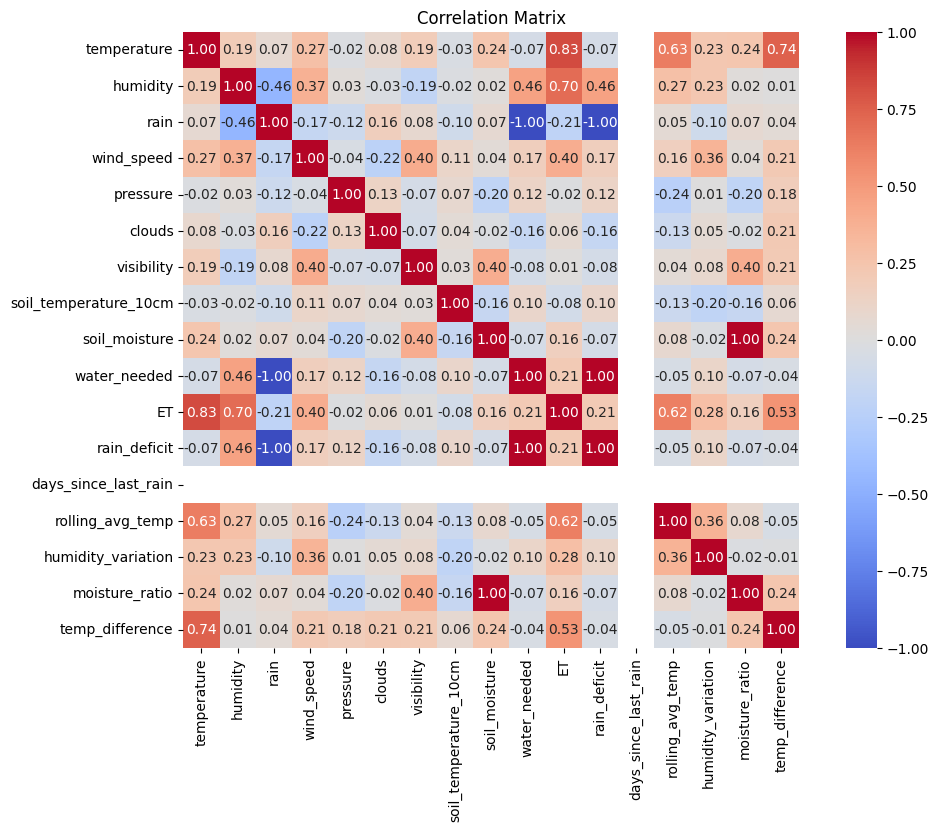

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()



Mean Squared Error: 0.33
R^2 Score: 0.94


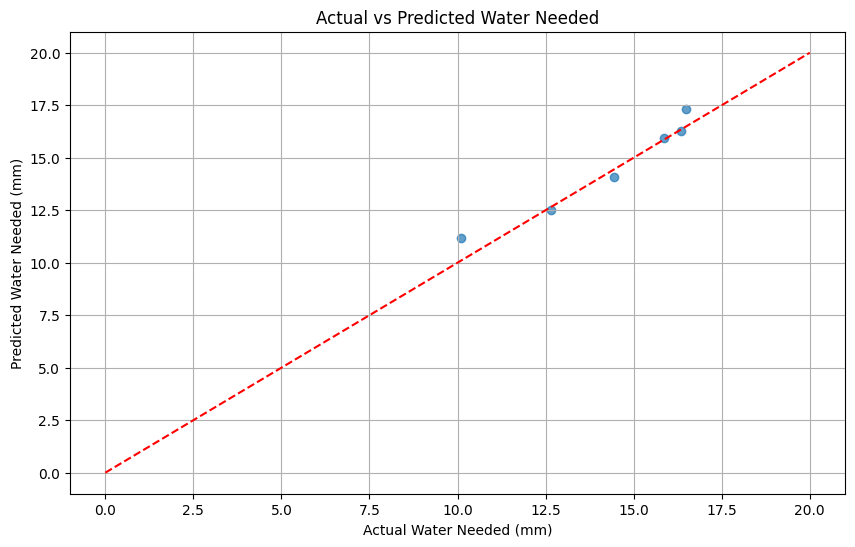

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.7)
plt.plot([0, 20], [0, 20], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual Water Needed (mm)')
plt.ylabel('Predicted Water Needed (mm)')
plt.title('Actual vs Predicted Water Needed')
plt.grid()
plt.show()
